# World Wine Society Classifier

Ian Kollipara

CS 392 Seminar in Data Science

2022.02.24

In [18]:
import polars as pl
from pandas import read_csv as pd_read_csv
import seaborn as sns

In [20]:
df = pl.DataFrame._from_pandas(pd_read_csv("Red Wine.csv", sep=";"))
print(df.shape)
df

(1599, 12)


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64
7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6
7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.0,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
7.9,0.6,0.06,1.6,0.069,15.0,59.0,0.9964,3.3,0.46,9.4,5
7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7


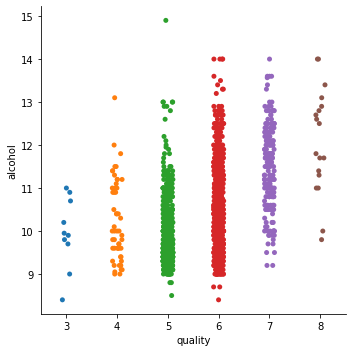

In [24]:
sns.catplot(y="alcohol", x="quality", data=df.to_pandas())